In [1]:
from gsnn_lib.proc.sc.load import load_scp_dataset
import numpy as np
from matplotlib import pyplot as plt
import scanpy as sc

In [2]:
adata = load_scp_dataset() 

In [3]:
# Display the basic structure of the AnnData object
print(adata)

AnnData object with n_obs × n_vars = 799317 × 110984
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway_level_1', 'pathway_level_2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'cancer', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID'
    var: 'ensembl_id', 'ncounts', 'ncells'


In [4]:
# Show the first few rows of the observation (obs) dataframe
adata.obs.head()

,ncounts,well,plate,cell_line,replicate,time,dose_value,pathway_level_1,pathway_level_2,perturbation,...,disease,cancer,tissue_type,organism,perturbation_type,ngenes,percent_mito,percent_ribo,nperts,chembl-ID
cell_barcode,,,,,,,,,,,,,,,,,,,,,
A01_E09_RT_BC_100_Lig_BC_147,2957,plate6_A9,plate44,MCF7,rep2,24.0,10000.0,Tyrosine kinase signaling,RTK activity,TAK-901,...,breast adenocarcinoma,True,cell_line,human,drug,1655,0.0,0.0,1,CHEMBL3544932
A01_E09_RT_BC_100_Lig_BC_186,1528,plate8_H3,plate46,MCF7,rep2,24.0,10.0,Tyrosine kinase signaling,RTK activity,AG-490 (Tyrphostin B42),...,breast adenocarcinoma,True,cell_line,human,drug,975,0.0,0.0,1,CHEMBL1257042
A01_E09_RT_BC_100_Lig_BC_196,1881,plate3_C2,plate41,MCF7,rep2,24.0,1000.0,Epigenetic regulation,Histone deacetylation,Abexinostat (PCI-24781),...,breast adenocarcinoma,True,cell_line,human,drug,1176,0.0,0.0,1,CHEMBL2103863
A01_E09_RT_BC_100_Lig_BC_213,1700,plate9_E3,plate51,A549,rep2,72.0,1000.0,Cell cycle regulation,Aurora kinase activity,Alisertib (MLN8237),...,lung adenocarcinoma,True,cell_line,human,drug,1081,0.0,0.0,1,CHEMBL483158
A01_E09_RT_BC_100_Lig_BC_220,1430,plate8_H10,plate30,K562,rep2,24.0,10000.0,DNA damage & DNA repair,Alkylating agent,Busulfan,...,chronic myelogenous leukemia,True,cell_line,human,drug,1009,0.0,0.0,1,CHEMBL820


In [28]:
# what doses 
print(adata.obs['dose_value'].unique())

[10000.    10.  1000.   100.     0.    nan]


In [29]:
# what cell lines 
print(adata.obs['cell_line'].unique())

['MCF7', 'A549', 'K562', NaN]
Categories (3, object): ['A549', 'K562', 'MCF7']


In [32]:
# how many drugs 
print(len(adata.obs['perturbation'].unique()))

190


In [33]:
# what time 
print(adata.obs['time'].unique())

[24. 72. nan]


In [34]:
# total number of samples 
adata.shape

(799028, 65092)

In [5]:
adata.var.head()

,ensembl_id,ncounts,ncells
gene_symbol,,,
nan,id gene_short_name,26582.0,23228
nan:1,ENSG00000000003,35.0,33
nan:2,ENSG00000000005,163109.0,116153
nan:3,ENSG00000000419,49655.0,41883
nan:4,ENSG00000000457,57943.0,49609


In [6]:
adata.obs.describe()

,ncounts,time,dose_value,ngenes,percent_mito,percent_ribo,nperts
count,799317.000000,762795.000000,762795.000000,799317.000000,799317.0,799317.0,799317.000000
mean,2460.324271,29.166893,2448.166349,1260.350634,0.0,0.0,0.954308
std,2952.554978,14.876638,4005.989096,949.829690,0.0,0.0,0.208815
min,500.000000,24.000000,0.000000,19.000000,0.0,0.0,0.000000
25%,902.000000,24.000000,10.000000,619.000000,0.0,0.0,1.000000
50%,1502.000000,24.000000,100.000000,953.000000,0.0,0.0,1.000000
75%,2780.000000,24.000000,1000.000000,1554.000000,0.0,0.0,1.000000
max,111287.000000,72.000000,10000.000000,10738.000000,0.0,0.0,1.000000


In [7]:
adata.var.describe()

,ncounts,ncells
count,1.109840e+05,110984.000000
mean,1.771941e+04,9077.161465
std,8.107404e+05,36654.645915
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,7.000000e+00,7.000000
75%,2.060000e+02,189.000000
max,2.623801e+08,799260.000000


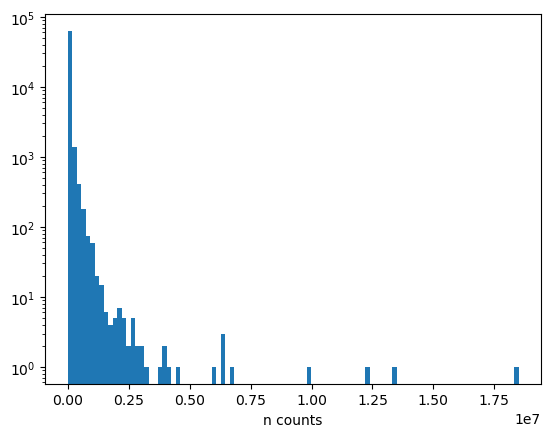

In [43]:
# n counts per gene 
plt.figure() 
plt.hist(adata.var['ncounts'][adata.var['ncounts'] < 0.4e8], bins=100) # few outliers at the high end
plt.xlabel('n counts')
plt.yscale('log')
plt.show()

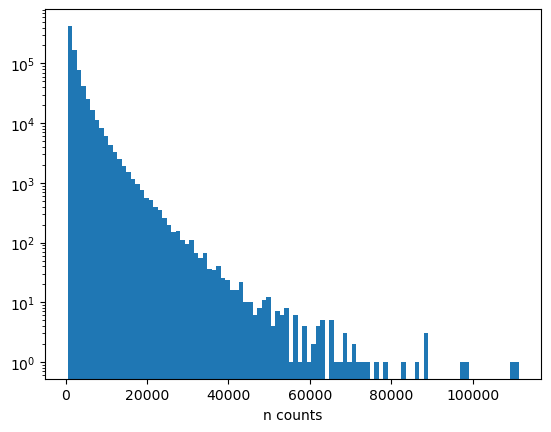

In [44]:
# n counts per cell
plt.figure() 
plt.hist(adata.obs['ncounts'], bins=100) # few outliers at the high end
plt.xlabel('n counts')
plt.yscale('log')
plt.show()

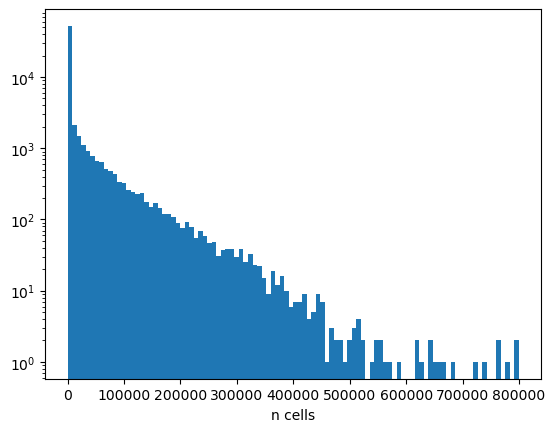

In [45]:
# ncells per gene 
plt.figure()
plt.hist(adata.var['ncells'], bins=100) # few outliers at the high end
plt.xlabel('n cells')
plt.yscale('log')
plt.show()

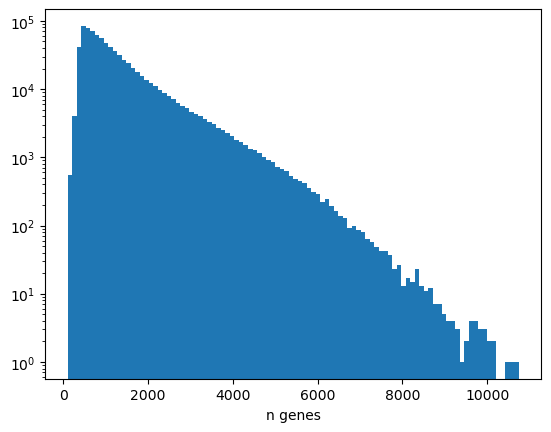

In [46]:
# ngenes per cell
plt.figure()
plt.hist(adata.obs['ngenes'], bins=100)
plt.xlabel('n genes')
plt.yscale('log')
plt.show()

In [9]:
conditions = adata.obs.groupby(['cell_line', 'perturbation', 'dose_value']).count()[['ncounts']].reset_index()[lambda x: x['ncounts'] > 0]
print('# of conditions:', conditions.shape[0])
conditions.sort_values('ncounts', ascending=False)

# of conditions: 2259


/tmp/ipykernel_24264/3826015892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conditions = adata.obs.groupby(['cell_line', 'perturbation', 'dose_value']).count()[['ncounts']].reset_index()[lambda x: x['ncounts'] > 0]


,cell_line,perturbation,dose_value,ncounts
2830,MCF7,control,0.0,7786
940,A549,control,0.0,5857
1885,K562,control,0.0,3935
708,A549,Ruxolitinib (INCB018424),1000.0,860
428,A549,Iniparib (BSI-201),1000.0,856
...,...,...,...,...
929,A549,YM155 (Sepantronium Bromide),10000.0,26
2819,MCF7,YM155 (Sepantronium Bromide),10000.0,25
2816,MCF7,YM155 (Sepantronium Bromide),10.0,24
2817,MCF7,YM155 (Sepantronium Bromide),100.0,19


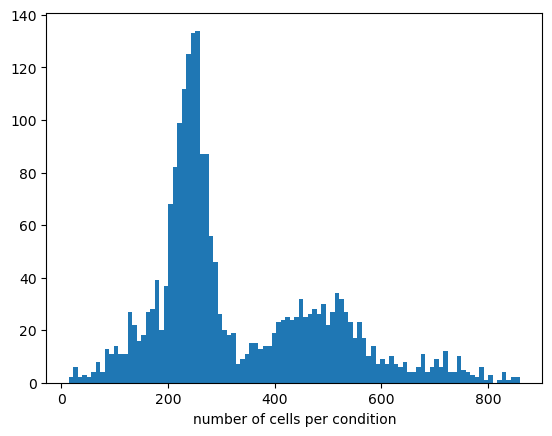

In [10]:
plt.figure()
plt.hist(conditions[lambda x: x.ncounts < 2000].ncounts, bins=100) # controls have 4,6,8 k cells
plt.xlabel('number of cells per condition')
plt.show()

In [11]:
# How many replicates
adata.obs.replicate.unique()

['rep2', 'rep1', NaN]
Categories (2, object): ['rep1', 'rep2']

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


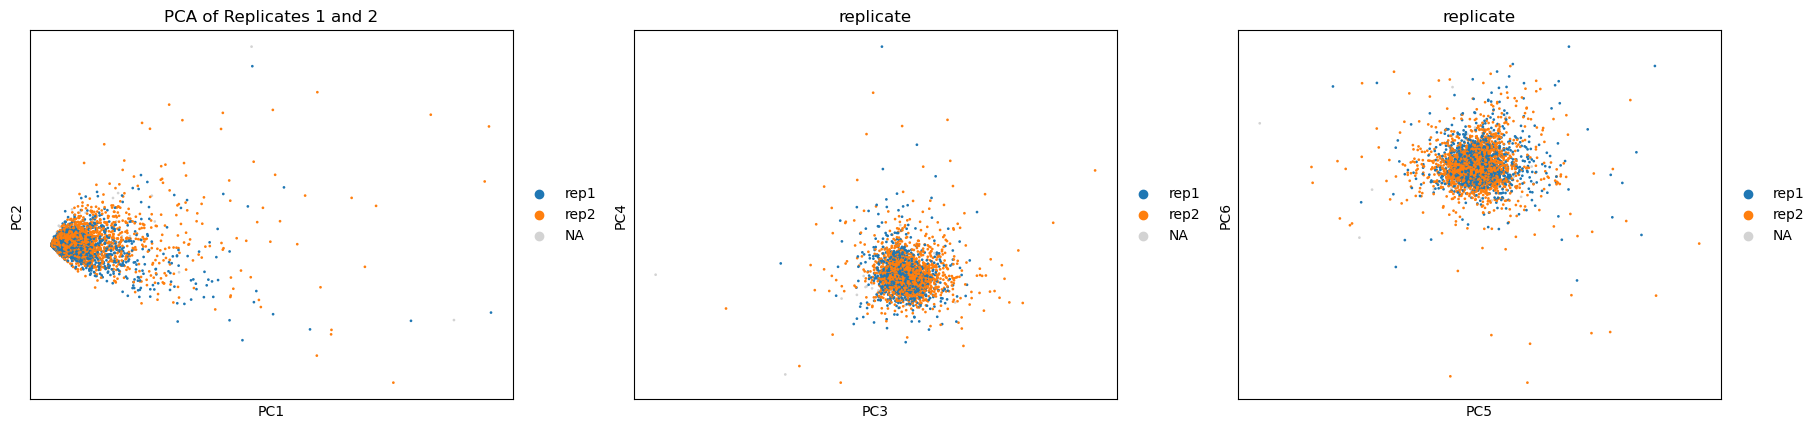

In [12]:
# Subset the data to include only replicates 1 and 2
lil_adata = sc.pp.subsample(adata, fraction=0.01, copy=True)

# Compute the PCA embedding
sc.tl.pca(lil_adata, n_comps=6)

# Plot the PCA embedding, coloring by replicate to visualize batch effects
sc.pl.pca(lil_adata, color='replicate', title='PCA of Replicates 1 and 2', dimensions=[(0, 1), (2, 3), (4, 5)])

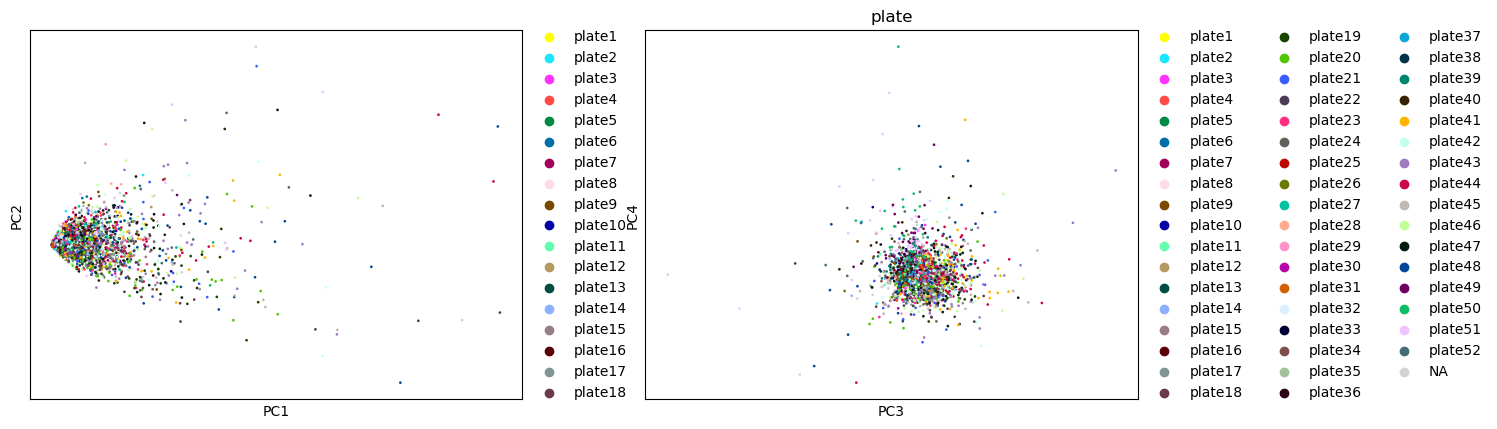

In [49]:
#sc.pl.pca(lil_adata, color='plate', title='', dimensions=[(0, 1), (2, 3)])

In [51]:
# too many 
#sc.pl.pca(lil_adata, color='well', title='', dimensions=[(0, 1), (2, 3)])

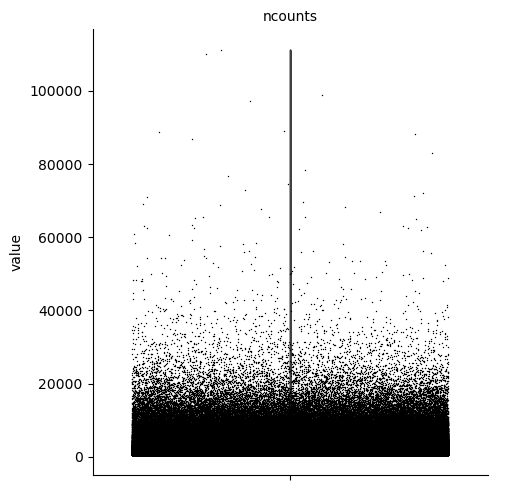

In [13]:
sc.pl.violin(
    adata,
    ["ncounts"],
    jitter=0.4,
    multi_panel=True,
)

In [14]:
adata2 = sc.pp.subsample(adata, fraction=0.1, copy=True)

sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [15]:
adata3 = sc.pp.scrublet(sc.pp.subsample(adata2, n_obs=5000, copy=True), copy=True)

# predicted doublets: 61/5000


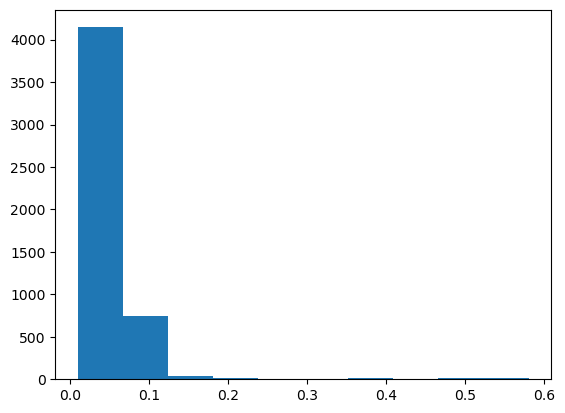

In [16]:
print(f'# predicted doublets: {sum(adata3.obs["predicted_doublet"])}/{adata3.shape[0]}')

plt.figure()
plt.hist(adata3.obs['doublet_score'])
plt.show() 

In [18]:
# Normalizing to median total counts
sc.pp.normalize_total(adata2)
# Logarithmize the data
sc.pp.log1p(adata2)

In [20]:
sc.pp.highly_variable_genes(adata2, n_top_genes=1000)

In [21]:
sc.tl.pca(adata2)

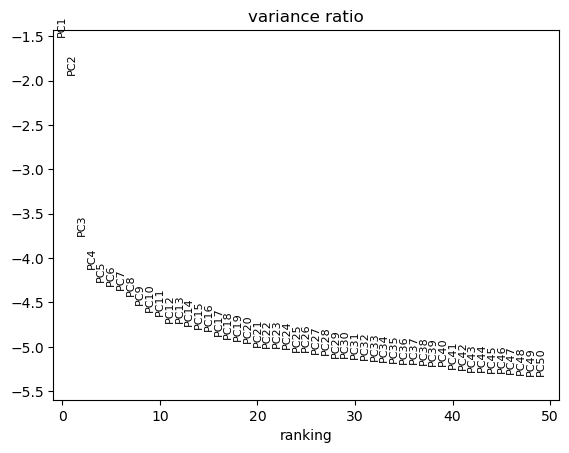

In [22]:
sc.pl.pca_variance_ratio(adata2, n_pcs=50, log=True)

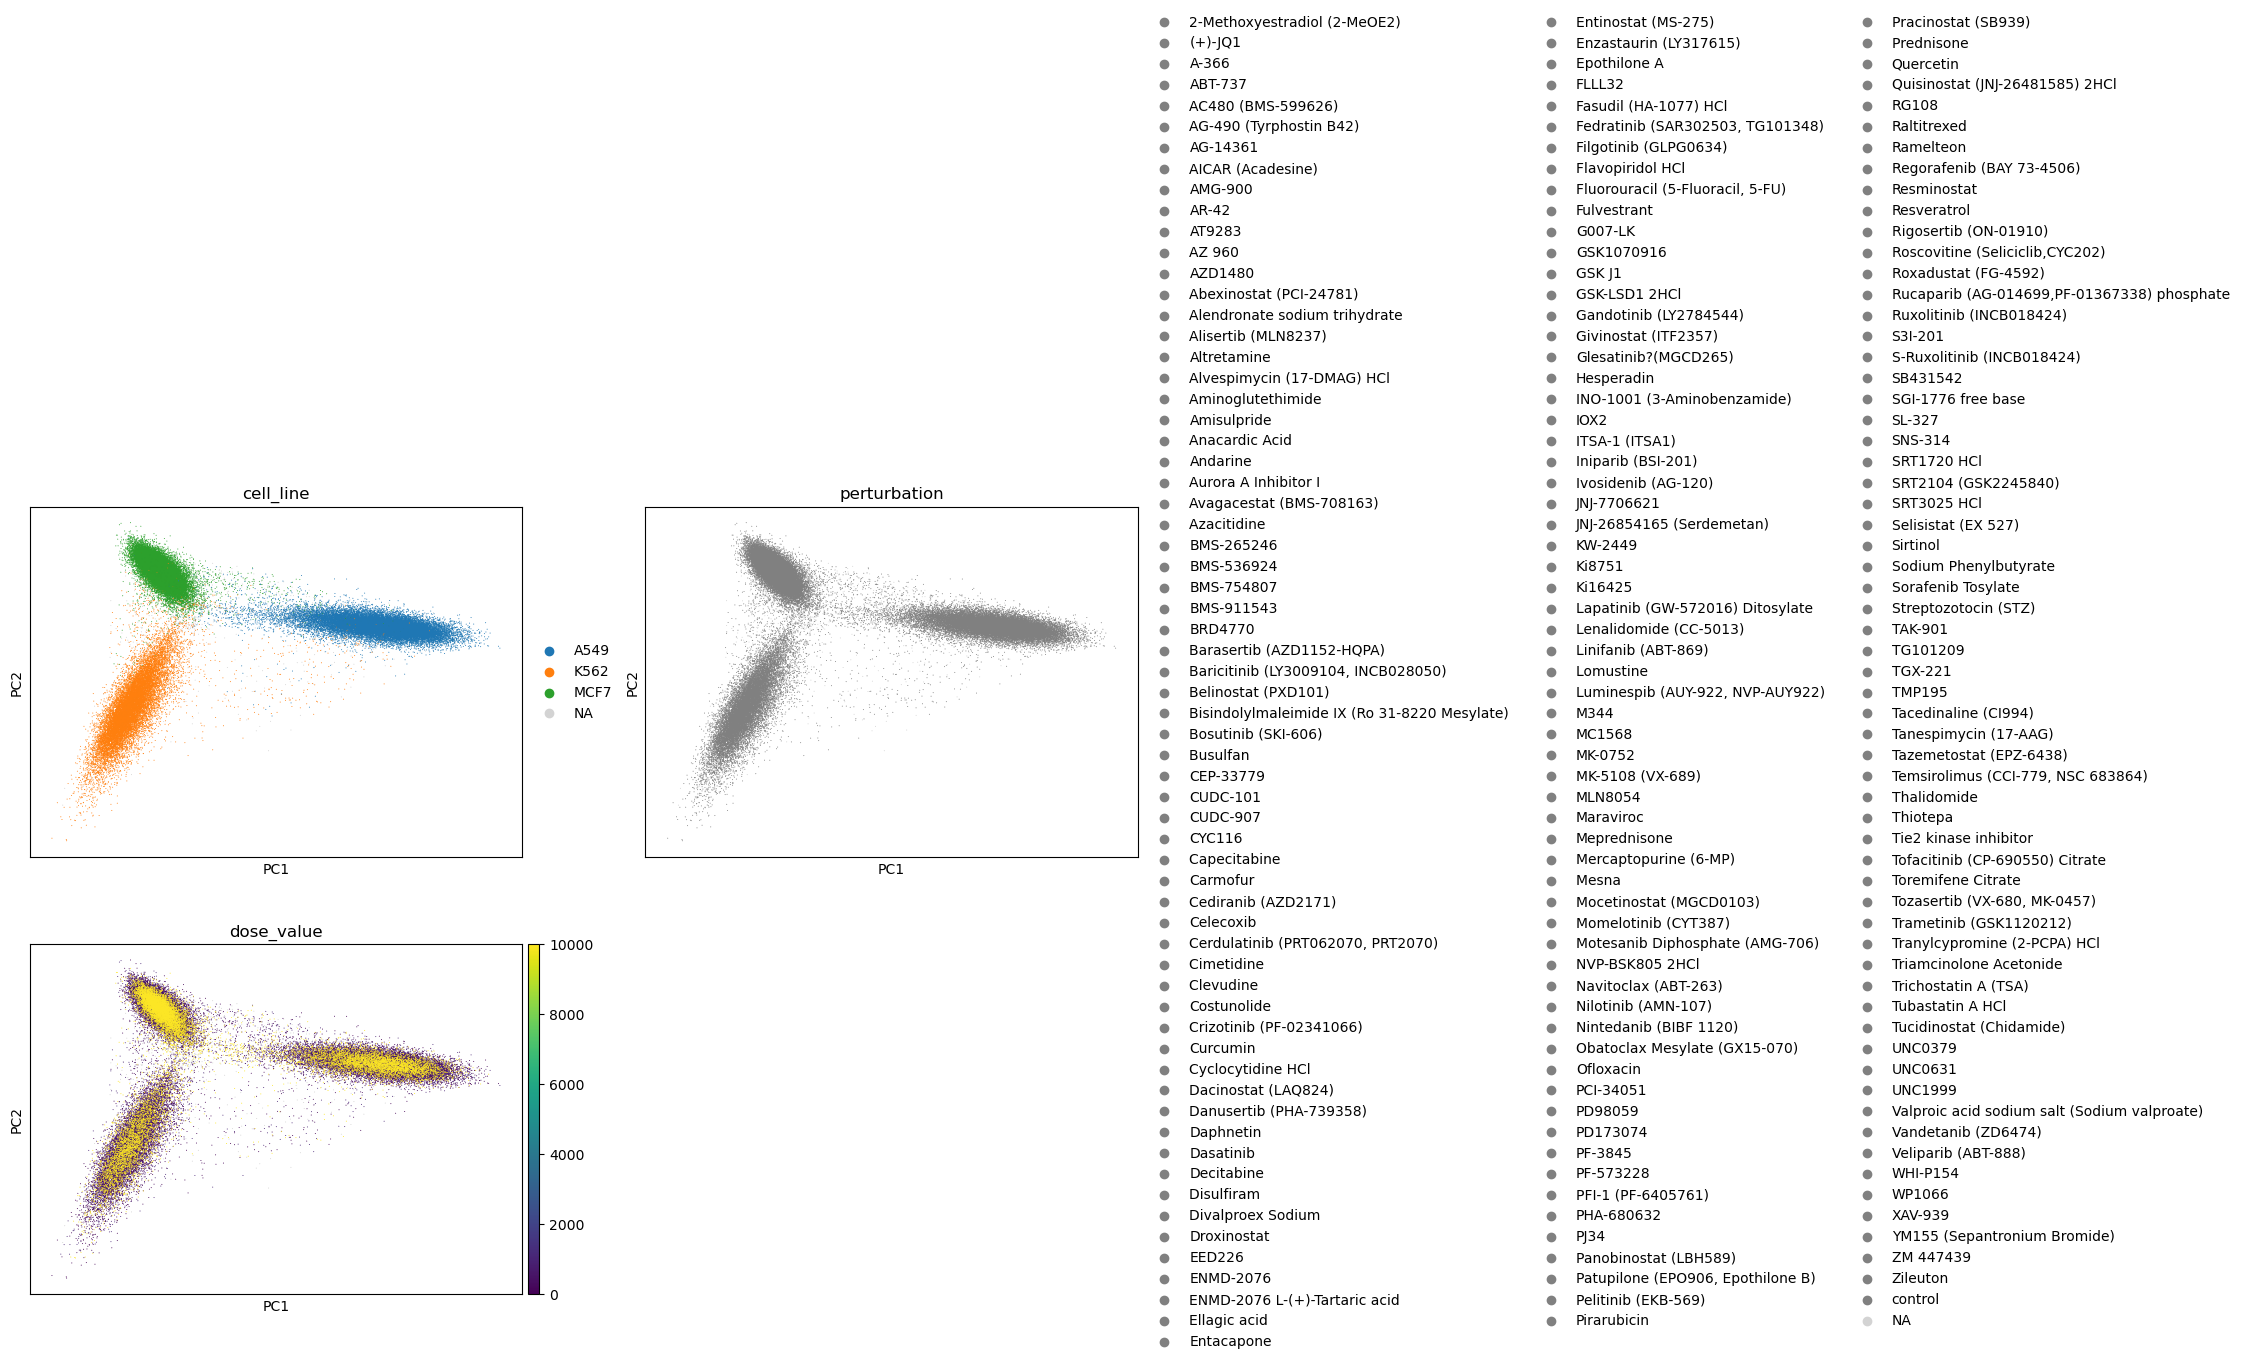

In [25]:
sc.pl.pca(
    adata2,
    color=['cell_line', 'perturbation', 'dose_value'],
    dimensions=[(0, 1), (0, 1), (0, 1)],
    ncols=2,
    size=2,
)